# Review of relevant machine learning methods

In this section, we will review some key terms and methods from classical machine learning that will help us to better understand the workflows in quantum machine learning. We will first introduce some general terms, before doing a deeper dive on two types of machine learning: kernel methods (especially in the context of a support vector machine) and neural networks. There are certainly connections between these methods, but we will treat them as distinct due to the differences in quantum workflows discussed here and in later lessons.
This is only a cursory overview, and we will skip a great deal of nuance. For a more complete overview of machine learning, we recommend resources like [1-3](#References).

## Types of machine learning

### Supervision

As a simple definition, machine learning is a collection of algorithms that analyze and draw inferences from patterns and relationships in data. Broadly speaking, machine learning algorithms can be grouped into 3 main categories depending on the type of data involved and how algorithms learn without being explicitly programmed:
1.	__Supervised learning:__ In supervised learning, the data that is used to train the model is labeled. The goal of these algorithms is to learn the relationship between data and their corresponding labels or outputs and to generalize this to unseen data. Common tasks in this class are classification and regression.
2.	__Unsupervised learning:__ In contrast to supervised learning, unsupervised learning uses unlabeled data to train the machine learning model. The goal of such algorithms is to discover hidden patterns and structure in data. Some algorithms in this class are clustering and dimensionality reduction algorithms. Some generative models such as generative adversarial networks and variational autoencoders can also be considered in this category.
3.	__Reinforcement learning:__ Algorithms in this machine learning category are defined by an agent which interacts with an environment. The agent takes actions and receives feedback from its environment in the form of rewards and punishments. Eventually through this feedback mechanism, the agent learns to take the correct set of actions to perform a specific task .

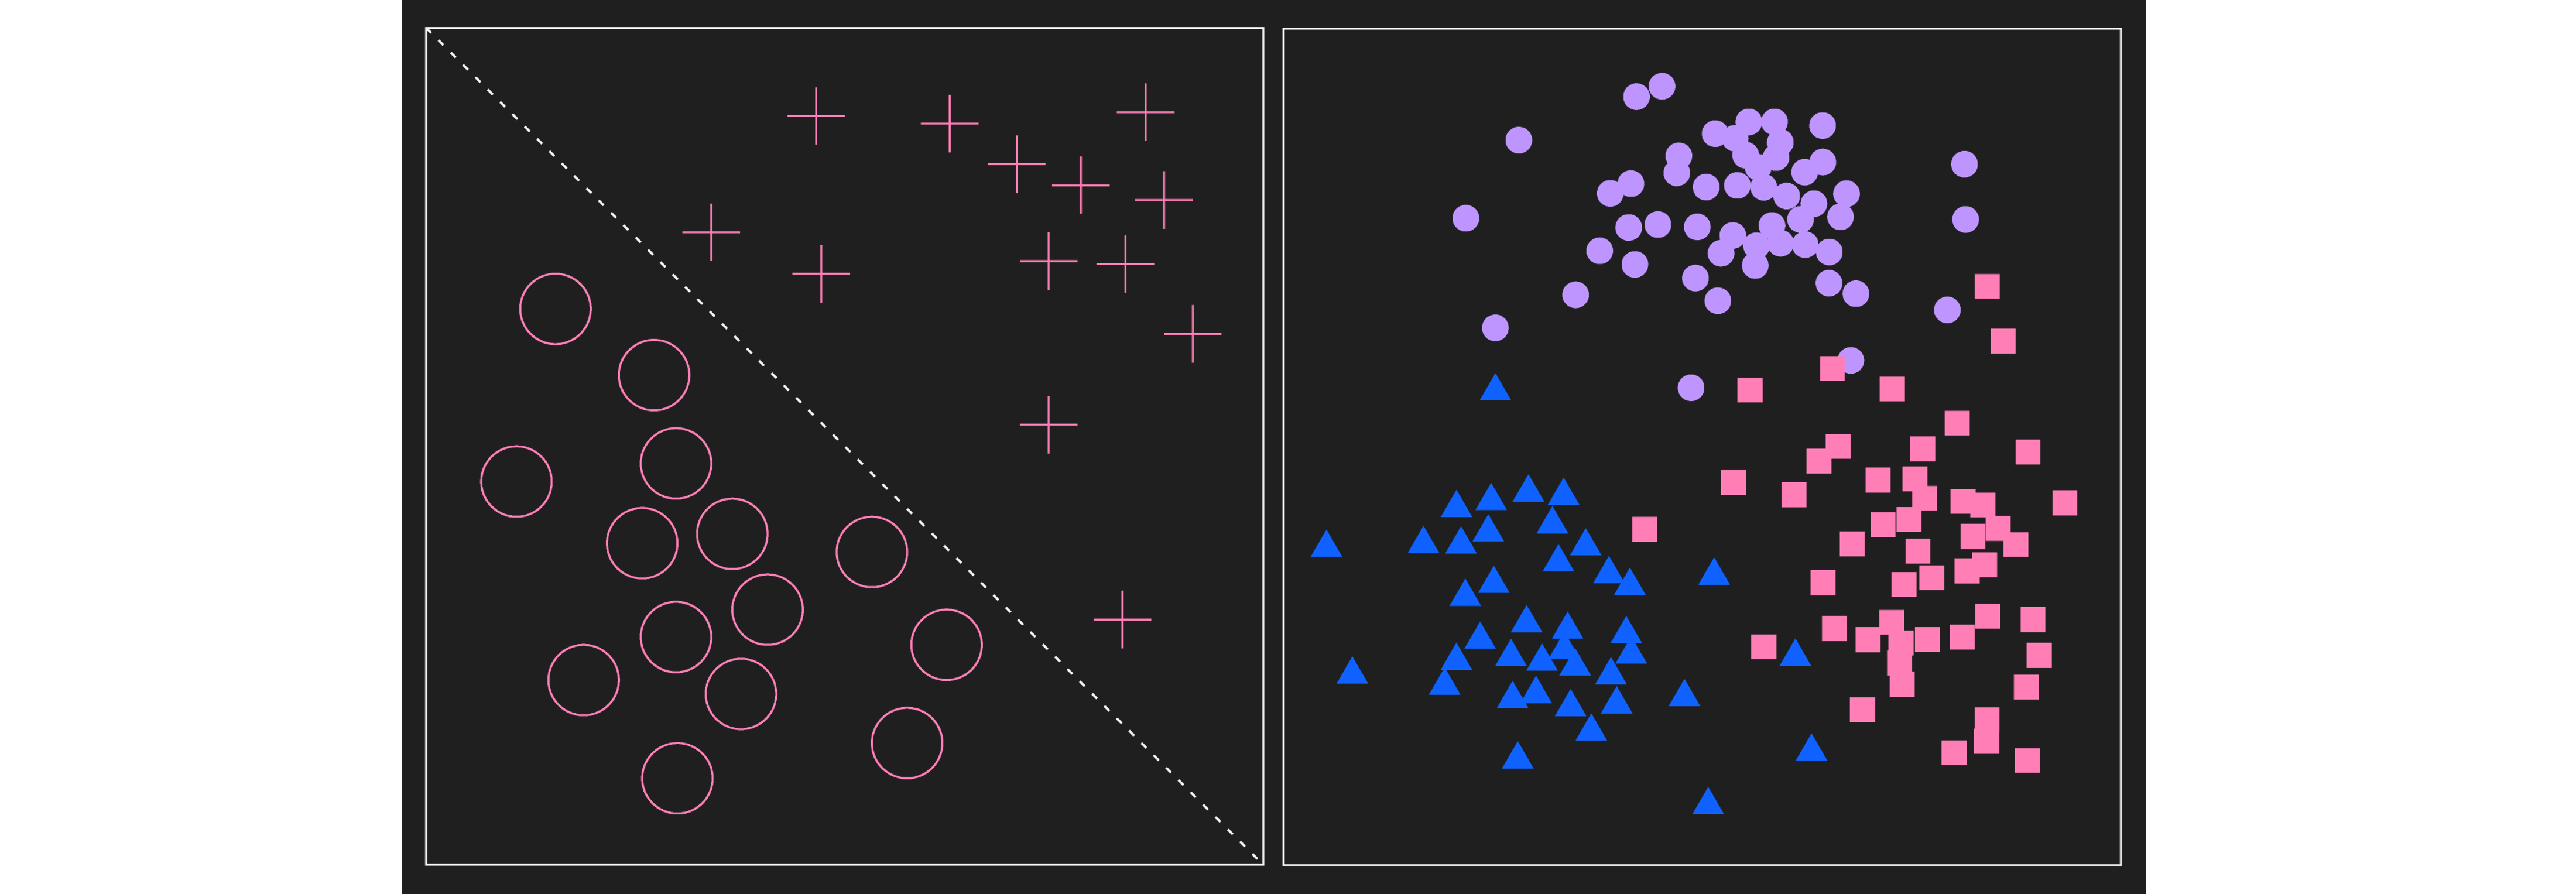
    
### Introducing “quantum” to machine learning

We can now start exploring how “quantum” is introduced into machine learning. In this broader categorization, we consider the type of model/algorithm on the processing device, as well as the type of data provided into it. The picture above summarizes these possible combinations.

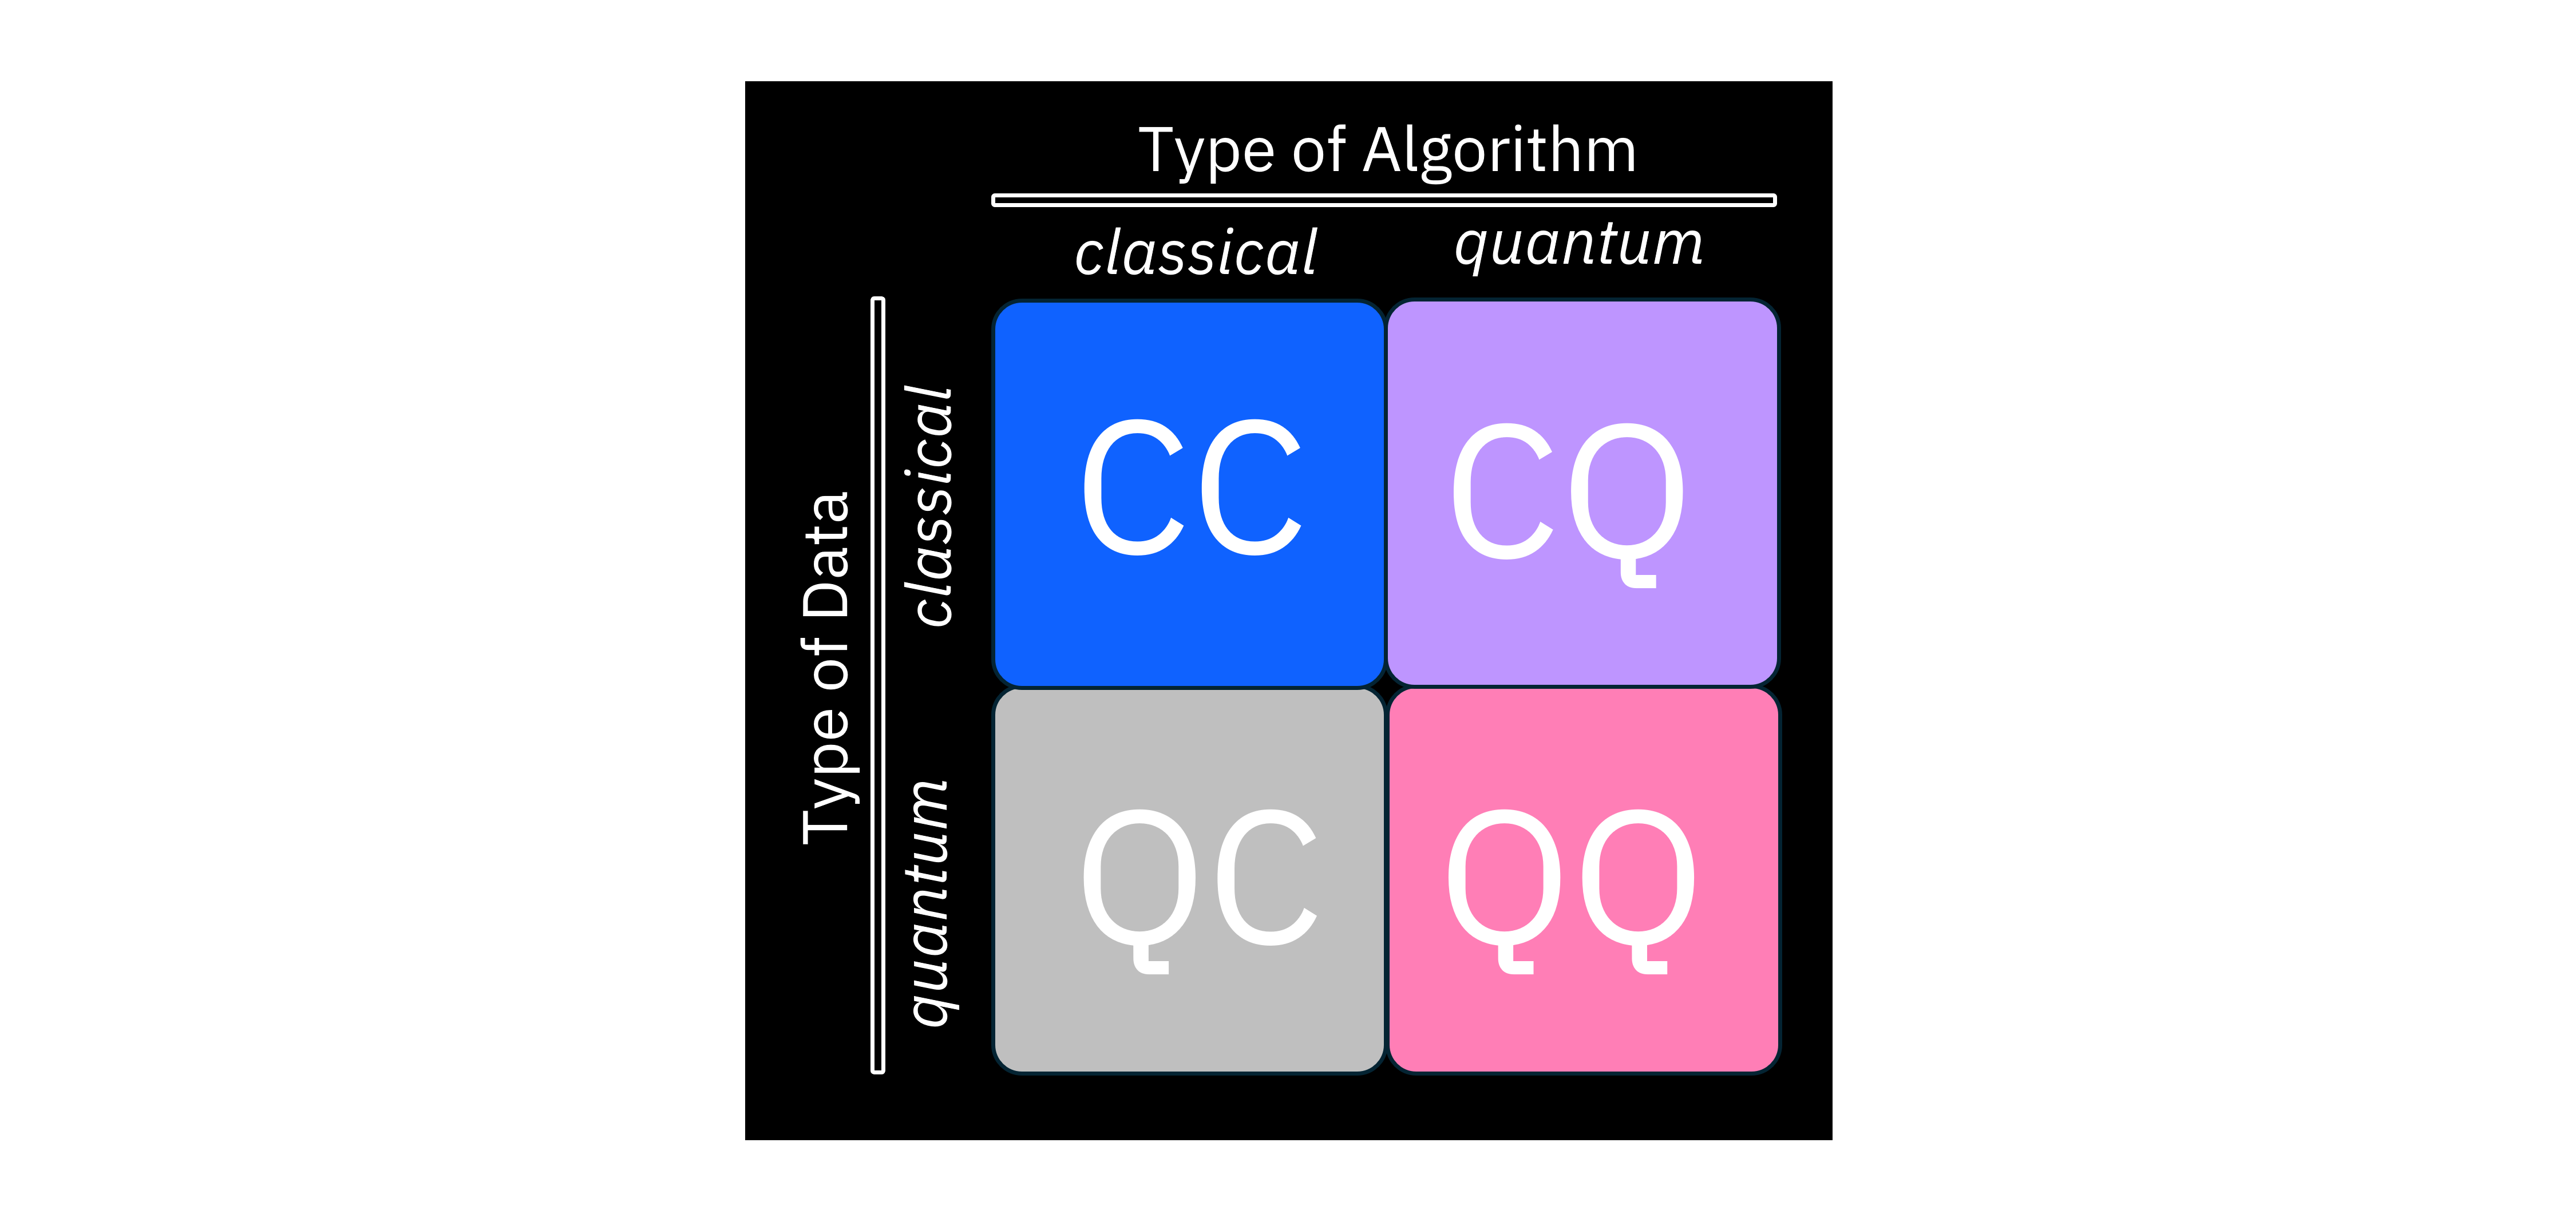

For instance, CC means that we have a classical dataset – such as images, sound, or text that we can store on classical computers - and that we also use a classical computer to run a machine learning algorithm. This is precisely the classical machine learning setting. On the other hand, QQ means that we are using a quantum computer to process quantum data. Here, “quantum data” could mean several things, and could be context-dependent. Quantum data could be thought of as a set of measurement outcomes obtained from a quantum device, or it could refer to states that have been prepared on a quantum computer by another algorithm. In the future, it could even refer to data stored in QRAM (i.e. Quantum Random Access Memory), which does not currently exist. When researchers talk about quantum machine learning, they usually refer to the CQ regime, where the dataset at hand is classical and the processing device executing the machine learning algorithm is a quantum computer. In the following parts of the course, we will focus on such algorithms.

## Support vector machines

We now recap a class of algorithms called support vector machines from a classical machine learning point of view. Later we will show how to bring quantum computing into this algorithm.

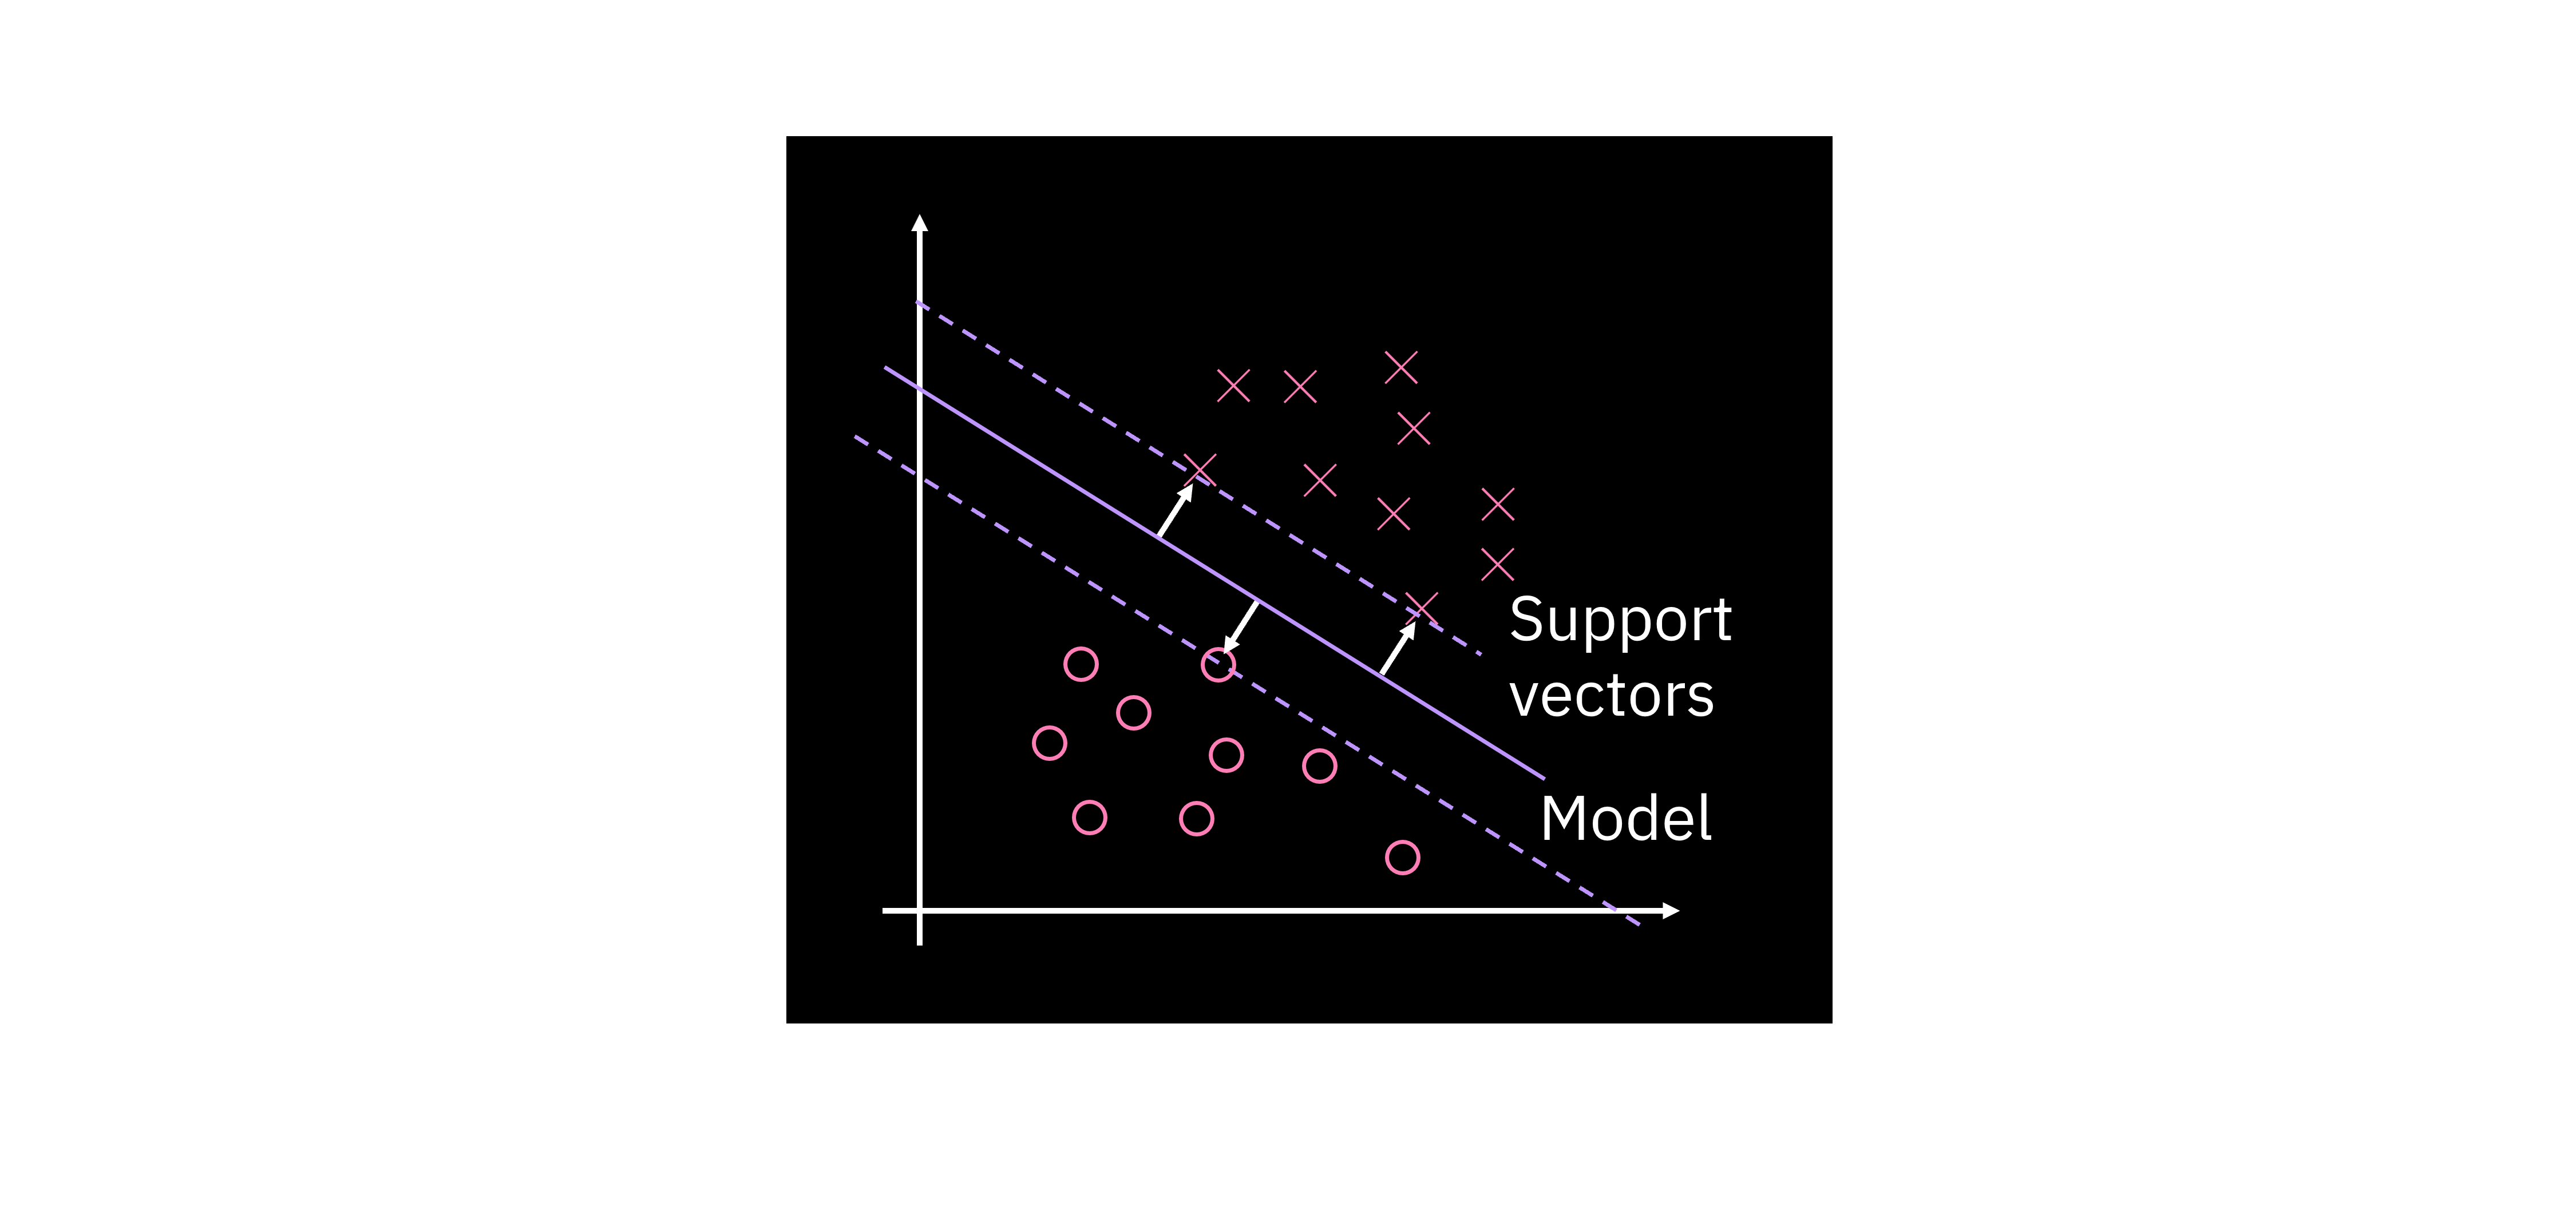

Let’s suppose a task of binary classification on a dataset with 2-dimensional feature space as shown in the plot. One thing we can do to perform classification for this dataset is to find a line, or in general a hyperplane that separates the two classes. In practice we can find infinitely many separating hyperplanes, so the question is: how do we define the optimal one? The idea here is that a particularly good decision boundary should maximize the margin, which is defined as the distance to the nearest points in each class. In this setting, the data points with the smallest distance to the decision boundary are called support vectors.

A linear decision bounary could be described in a number of ways; in some ways the most straightforward way is that shown in $f_1$ below. Here, $\Theta$ is the set of parameters defining the hyperplane, $\vec{x}$ is your dataset, and $b$ is a constant shift. $\Phi$ is a mapping from the space of input data points often (but not necessarily) to a higher dimensional space. We will return to this mapping below.

$$
f_1(\vec{x}) = \Theta^T \Phi(\vec{x})+b
$$
$$
f_2(\vec{x}) = \sum_{i=1}^n \alpha_i y_i \Phi^T(\vec{x}_i)\Phi(\vec{x})+b
$$ 

In the model $f_1,$ $\Theta$ is the vector of tunable parameters that the model would learn. This is what we call the “primal formulation”. With some mathematical manipulation we can show that there is a second way we can formulate the same problem, but this time we need to optimize over the alpha parameters shown in the second equation, which we refer to as the “dual formulation”, $f_2$. The main difference is that in the primal formulation the equation has an inner product between the feature vector and the learnable parameters, whereas in the dual formulation the inner product is between feature vectors. Even though the dual form includes both the training data features and the corresponding labels, we will see in the next section how it proves to be more useful than the primal form.

## Kernel methods and how quantum can play a role

The video below motivates how quantum can play a role in linear classifiers. This is described in greater detail in the text.

<iframe src="https://video.ibm.com/embed/recorded/133981147" style="border: 0;" webkitallowfullscreen="" allowfullscreen frameborder="no" width="480" height="270"></iframe>


### Moving to higher dimensional spaces

[](KTemme)In this and the following subsection, the discussion focuses on mappings to higher dimensions. The point here is to explain the "kernel trick" in the context of mappings between spaces, and thus set the stage for what a quantum kernel is. The point is __not__ that higher dimensions in quantum wave functions solve all of our problems. As mentioned in the introduction, classical Gaussian feature maps are already infinite-dimensional. The dimensionality of data features is important, but high-dimensional quantum states are not sufficient for improvement over classical methods.[](\KTemme)

Graphically, one can easily see how we can generalize the SVM approach to cases where the original data are not linearly separable, given the right mapping to higher dimensions. Looking at the 2-dimensional data on the left, we can see that there is no linear decision boundary that can separate the two classes. However, we can consider adding a third feature to our feature space. If this new feature is - for instance - the product of the previous two features $x_1$ and $x_2$, then the data becomes linearly separable. This also means that we can run the support vector machine algorithm successfully now on this higher dimensional feature space.

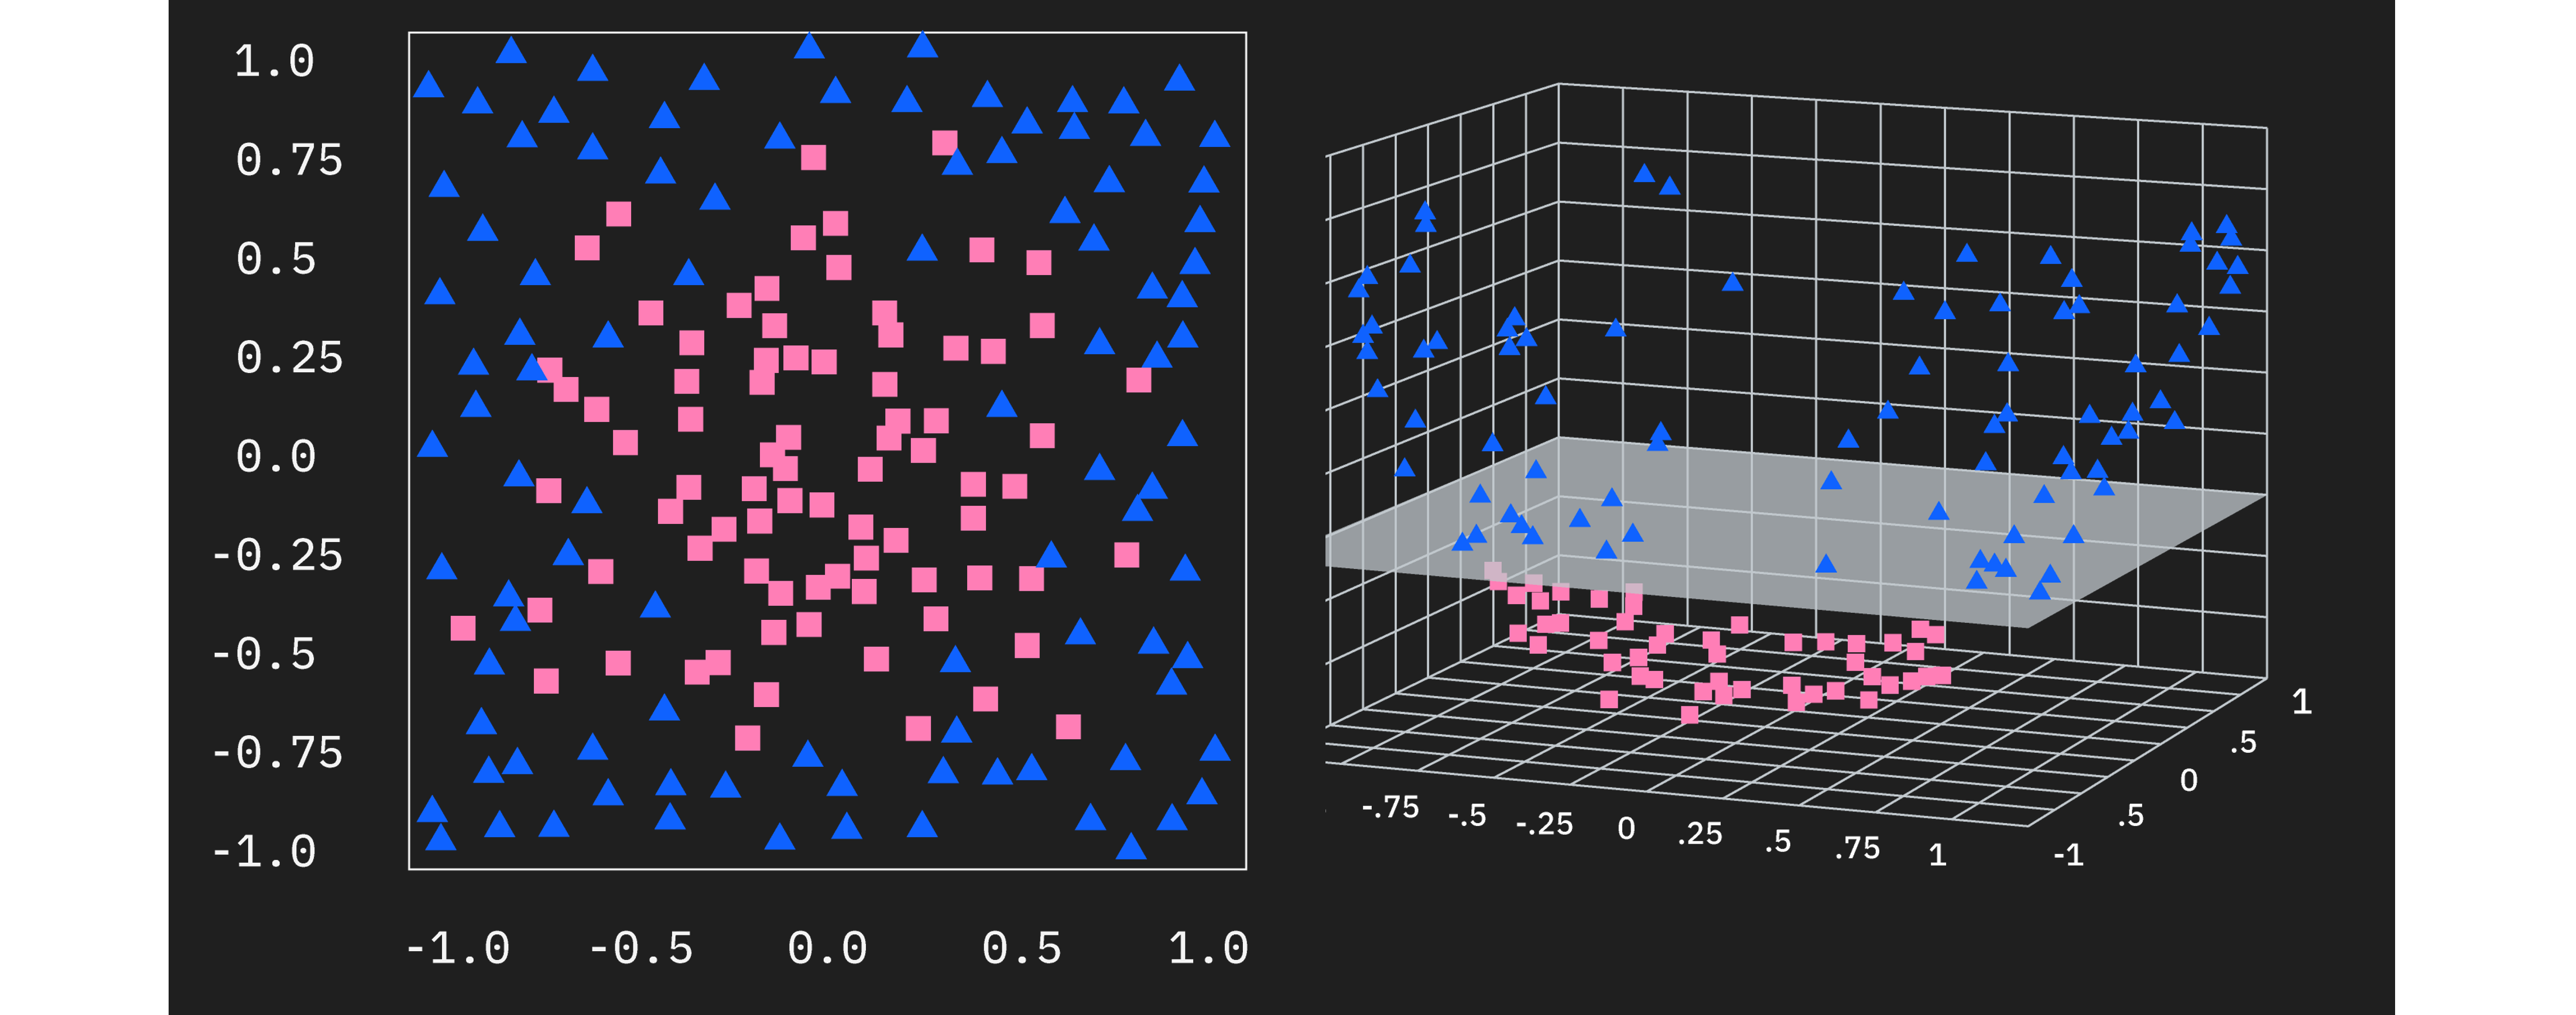

We also denote this “feature mapping” $\Phi$. The feature map often maps from the space of input data to a higher dimension, as is shown here, but there are models and algorithms that make use of mappings to lower dimensions. The mapping to higher dimensions is simply an easy case to visualize and understand.

$$
\vec{x} = \begin{pmatrix}x_1 \\ x_2 \end{pmatrix}
$$
$$
\vec{\Phi}(\vec{x}) = \begin{pmatrix}x_1 \\ x_2 \\ x_1 x_2\end{pmatrix}
$$

Some feature maps may map into very high dimensional spaces. In such cases, the high-dimensionality makes inner products more computationally expensive. We will return to that point below.

### Why is the dual form useful?

Recall the primal and dual formulations of our linear boundary model:

$$f_1(\vec{x}) = \Theta^T \Phi(\vec{x})+b$$
$$f_2(\vec{x}) = \sum_{i=1}^n \alpha_i y_i \Phi^T(\vec{x}_i)\Phi(\vec{x})+b$$

Now that we know that using a feature map to get to a higher dimensional space can allow us to successfully find a separating hyperplane, we can replace the original feature vector $\vec{x} in the equations with the feature-mapped vectors. However, if we do this in the primal formulation, we encounter the problem of having to compute the inner products between the parameters and a potentially very high dimensional feature map. However, in the dual formulation, we see that these are replaced with inner products between feature mapped vectors of different inputs.

For some feature maps, it may be possible to write the inner product of feature-mapped vectors $\vec{\Phi}^T(\vec{x}_i)\cdot \vec{\Phi}(\vec{x}_j)$ as a simple function $k(\vec{x}_i, \vec{x}_j)$ of the original (lower-dimensional) variables $\vec{x}_i$ and $\vec{x}_j$. For some choices of $\Phi,$ we may even be able to write $\vec{\Phi}^T(\vec{x}_i)\cdot \vec{\Phi}(\vec{x}_j)$ as a simple function of the lower-dimensional inner product $\vec{x}_i^T\vec{x}_j$ This is computationally very beneficial because we can access the space in which data are linearly separable, but without the cost of manipulations in higher dimensions. In fact, since the feature-mapped vectors only appear in the $f_2$ in inner products, we may not even need to explicitly carry out the feature mapping to compute the inner products.  We call the function $k(\vec{x}_i, \vec{x}_j)$ that calculates the inner products the “kernel function”, and this way of avoiding the feature map computation is called the “kernel trick”. In fact, the feature mapped vectors could even be infinite dimensional, but the kernel might still be very efficiently computable.

The kernel function itself is a function of two input data vectors. Inserting each pair of data vectors in the dataset as arguments of the kernel function results in a symmetric, positive semi-definite matrix, called the kernel matrix:

$$
k = \begin{pmatrix}k(\vec{x}_1,\vec{x}_1) & k(\vec{x}_1,\vec{x}_2) & ... \\ k(\vec{x}_2,\vec{x}_1) & k(\vec{x}_2,\vec{x}_2) & ... \\ \vdots & \vdots & \ddots\end{pmatrix}
$$

Once we compute the kernel matrix, then we can find the optimal parameters ($\alpha_i$) using methods such as quadratic programming software or an algorithm called “sequential minimal optimization”. Of course, this assumes that there exists an efficiently-calculable kernel corresponding to a feature map that makes your data classes linearly separable.  A related but novel approach is quantum kernel estimation.   

### Quantum kernels

Quantum computers, or quantum states in general, allow for a very natural definition of “quantum kernel”. We can interpret the encoding of an input $\vec{x}$ into a quantum state $|\Phi(\vec{x})\rangle$ as a feature map. This process may indeed map the data into a very high-dimensional space as is common in classical feature maps, but the dimensionality will depend on the encoding method (see the next lesson in this course). Recall that the inner product of two quantum states $\langle \psi | \phi \rangle$ is related to the probability of measuring the state $|\phi\rangle$ when in the state $|\psi\rangle$.measurement probability, we can estimate the inner product of the two mapped data points $\vec{\Phi}(\vec{x}_i)$ and $\vec{\Phi}(\vec{x}_j)$ by making sufficiently many measurements of the resulting circuit.

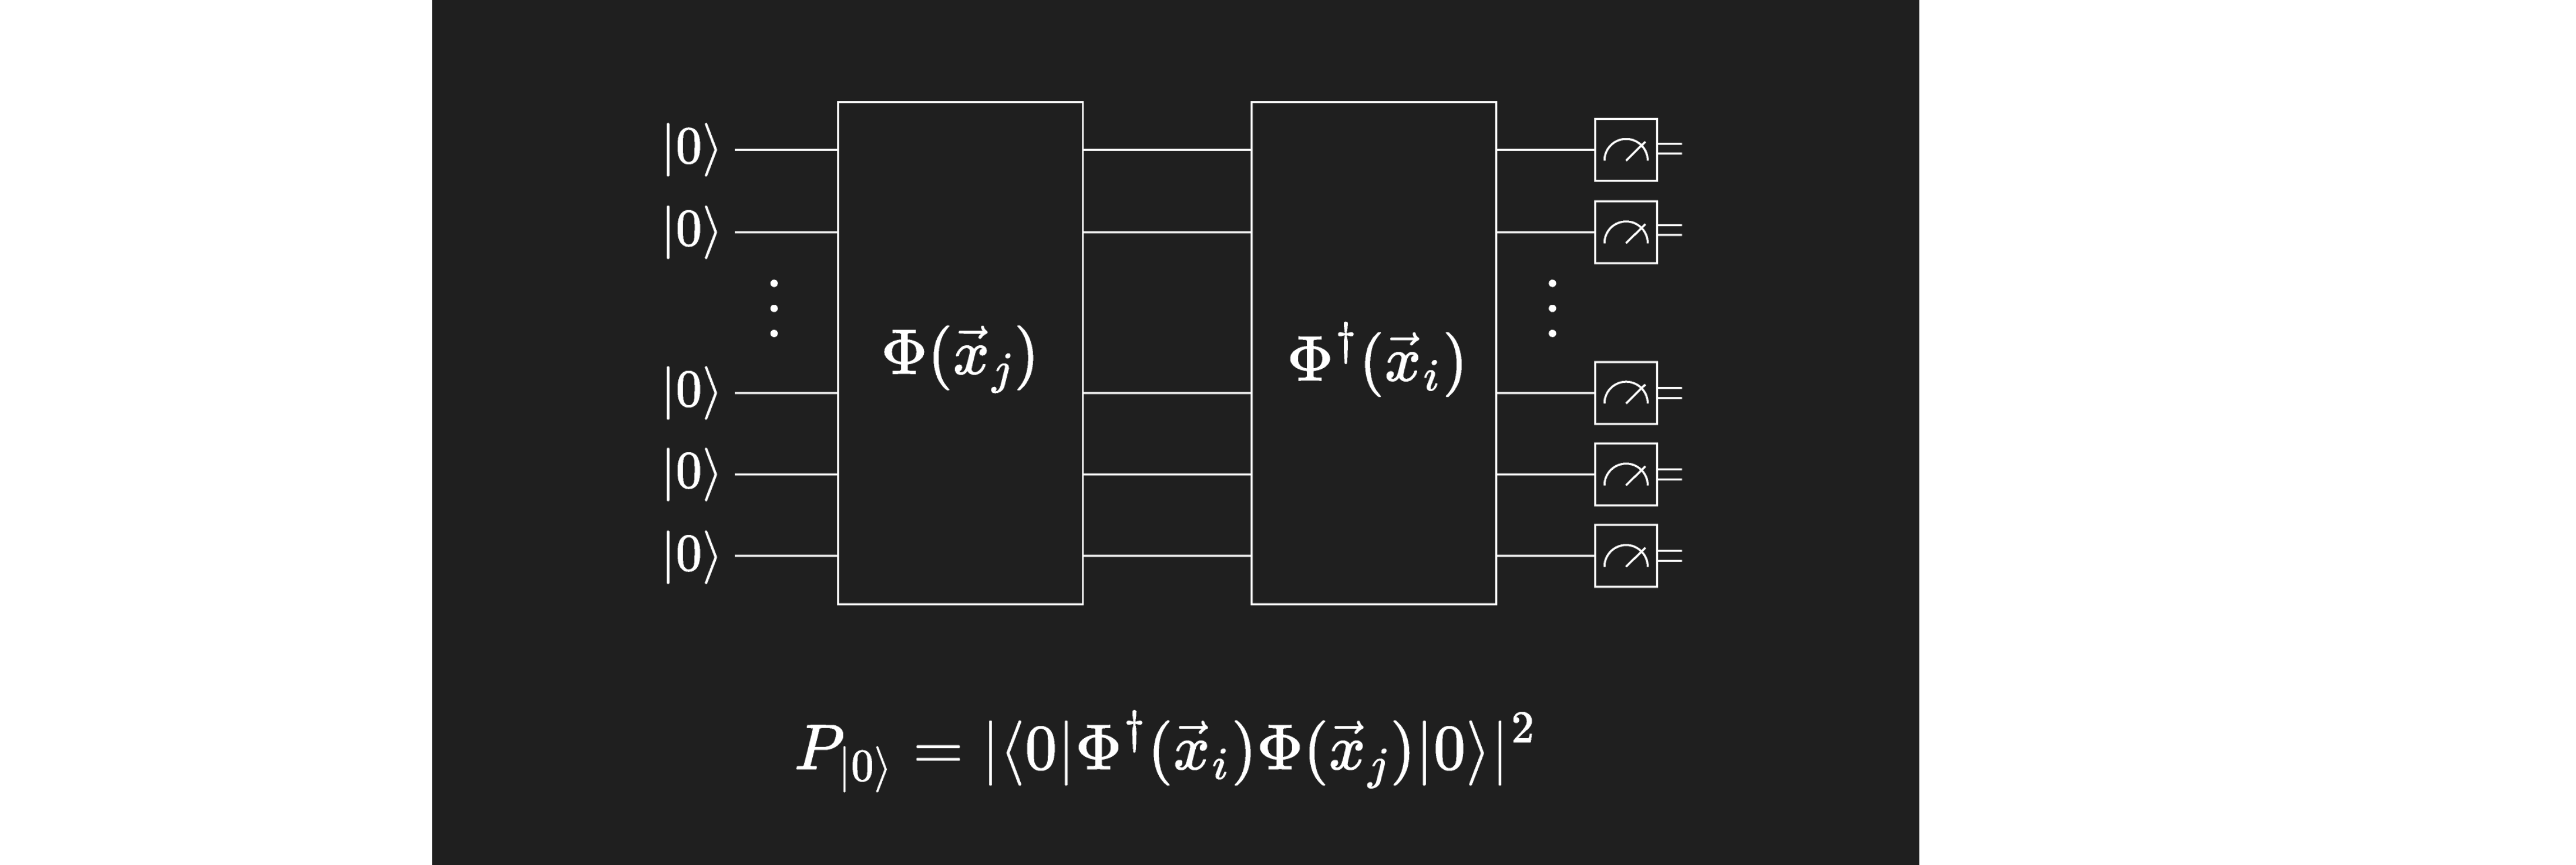

As we will see later in the course, we can use measurements on a quantum circuit like the one shown above to estimate a kernel, and we can then run SVM optimization classically on the kernel matrix learn the tunable parameters. 

## Variational quantum classifiers and neural networks

Another near-term quantum machine learning algorithm is called "variational quantum circuits" (VQCs). When these circuits are used in a classification task, you may see the same acronym used to refer to "variational quantum classifiers" (also VQCs). These often leverage structures similar to classical neural networks (NNs); and in those cases you will see them described as quantum neural networks (QNNs). It is important to understand that VQCs are more general and do not need to follow a NN structure, but we begin in analogy with NNs to help clarify the role that quantum can play in existing machine learning workflows. We will then discuss generalizations. We begin by recapping classical neural networks.

The video below gives a brief review of neural networks, and where they overlap with variational quantum circuits. This is explored more in the text.

<iframe src="https://video.ibm.com/embed/recorded/133981150" style="border: 0;" webkitallowfullscreen="" allowfullscreen frameborder="no" width="480" height="270"></iframe>

A neural network is a computational model which is loosely inspired by the structure and the function of neurons in a brain. These neurons, which are nodes that we see in the picture, are organized into layers, and are connected through weights.

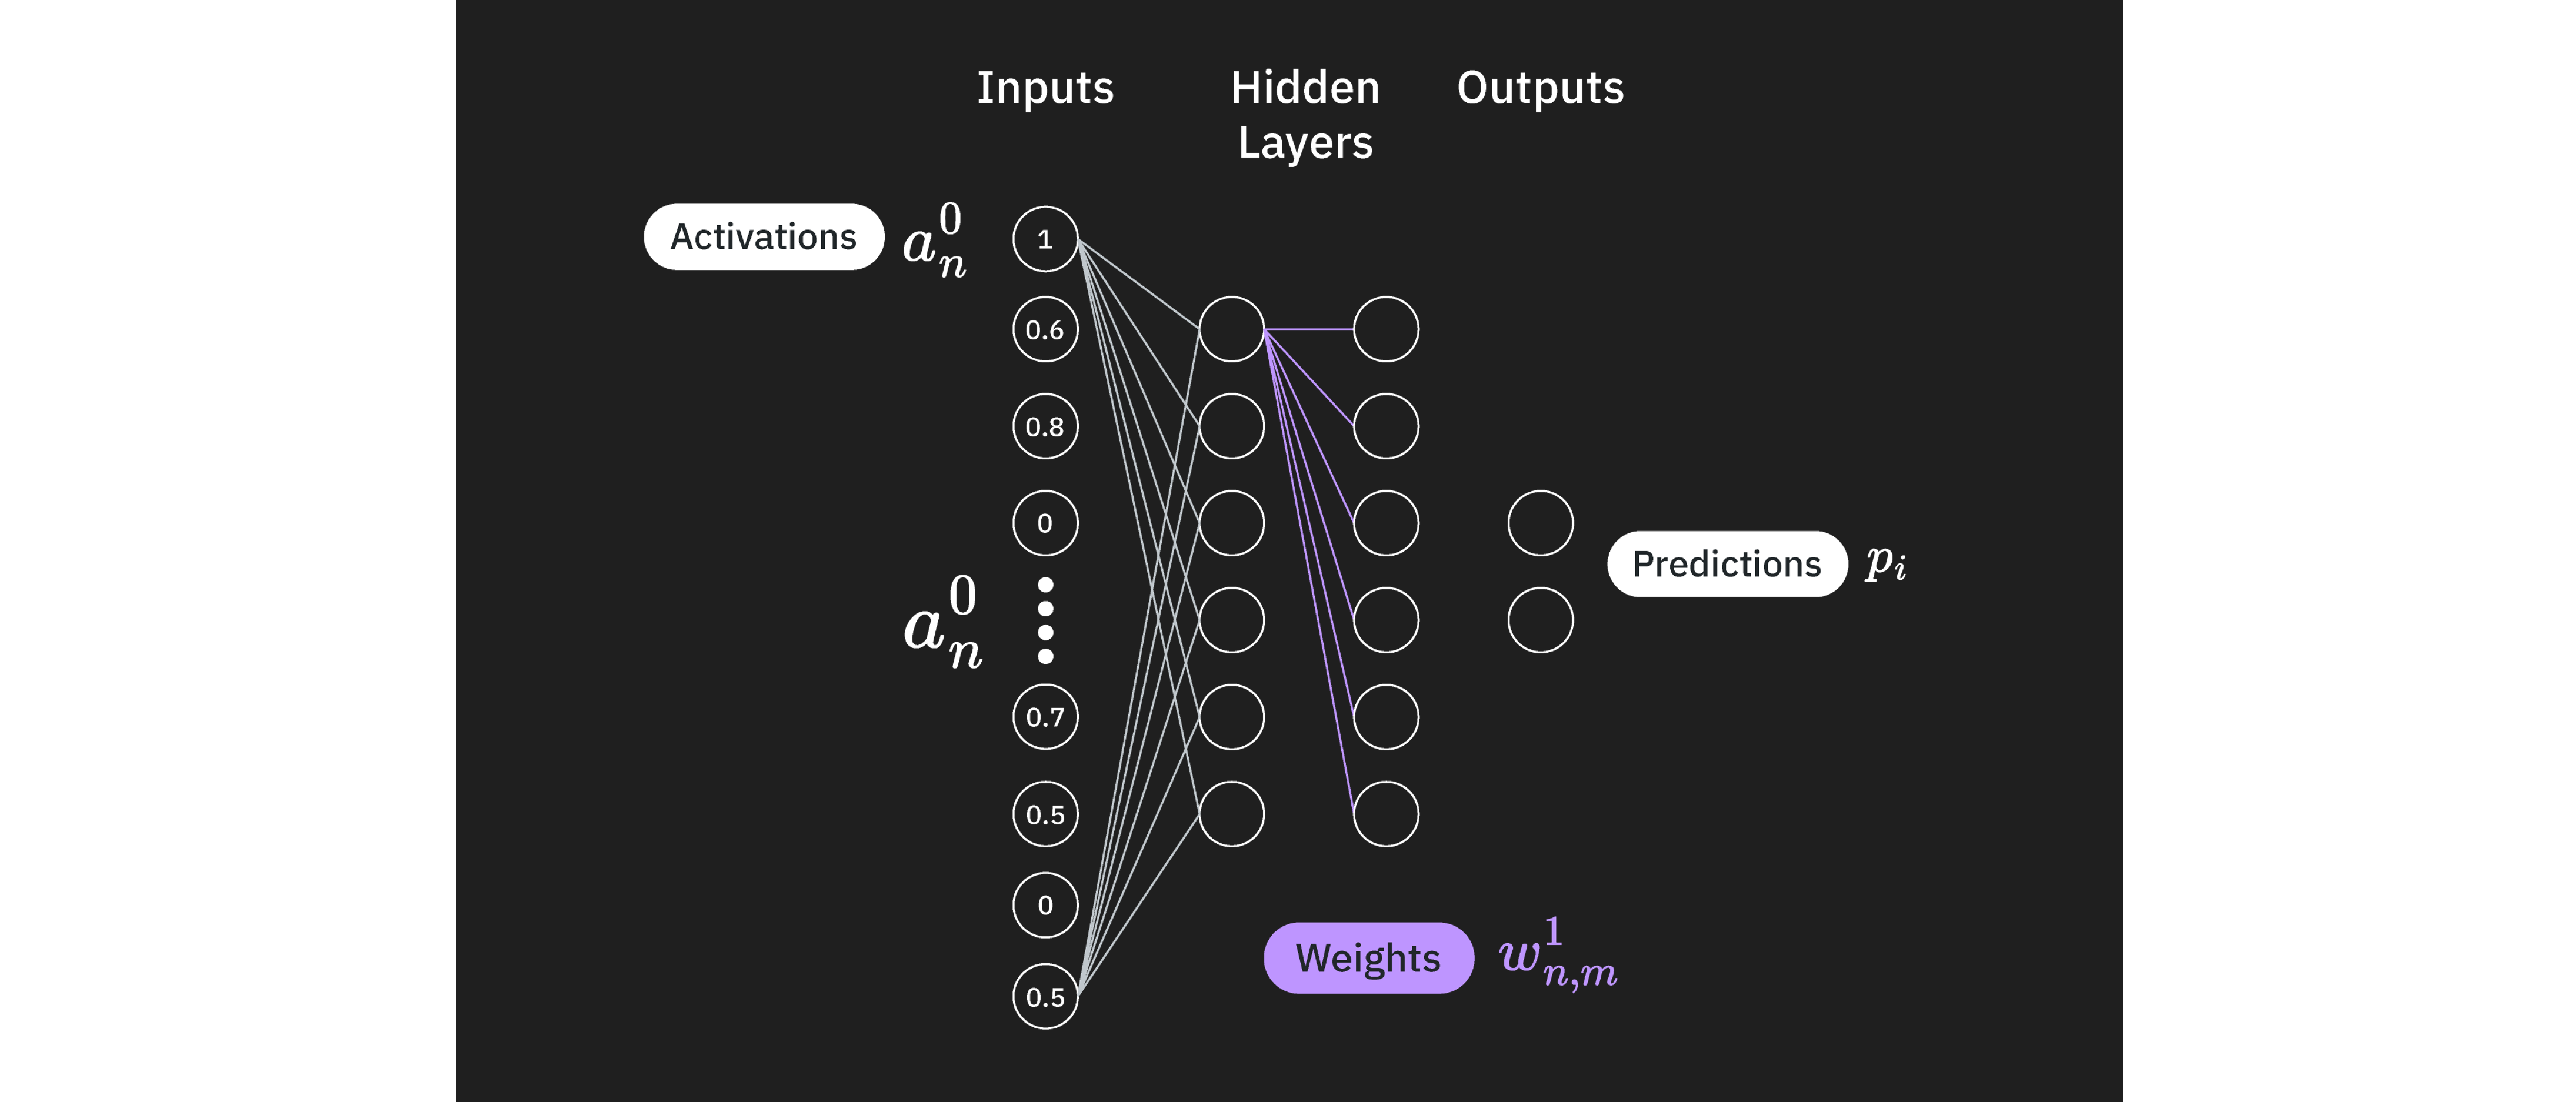

 The first layer is the input layer, and the activations $a_n^0$ of neurons in this layer are fed in directly from the data $\vec{x}$ to be analyzed (like shading of individual pixels in an image, for example). The final layer is an output layer that describes categorization (like classifying an image as having a 90% chance of being a dog, and 10% chance of being a cat, to stick with the image example). 

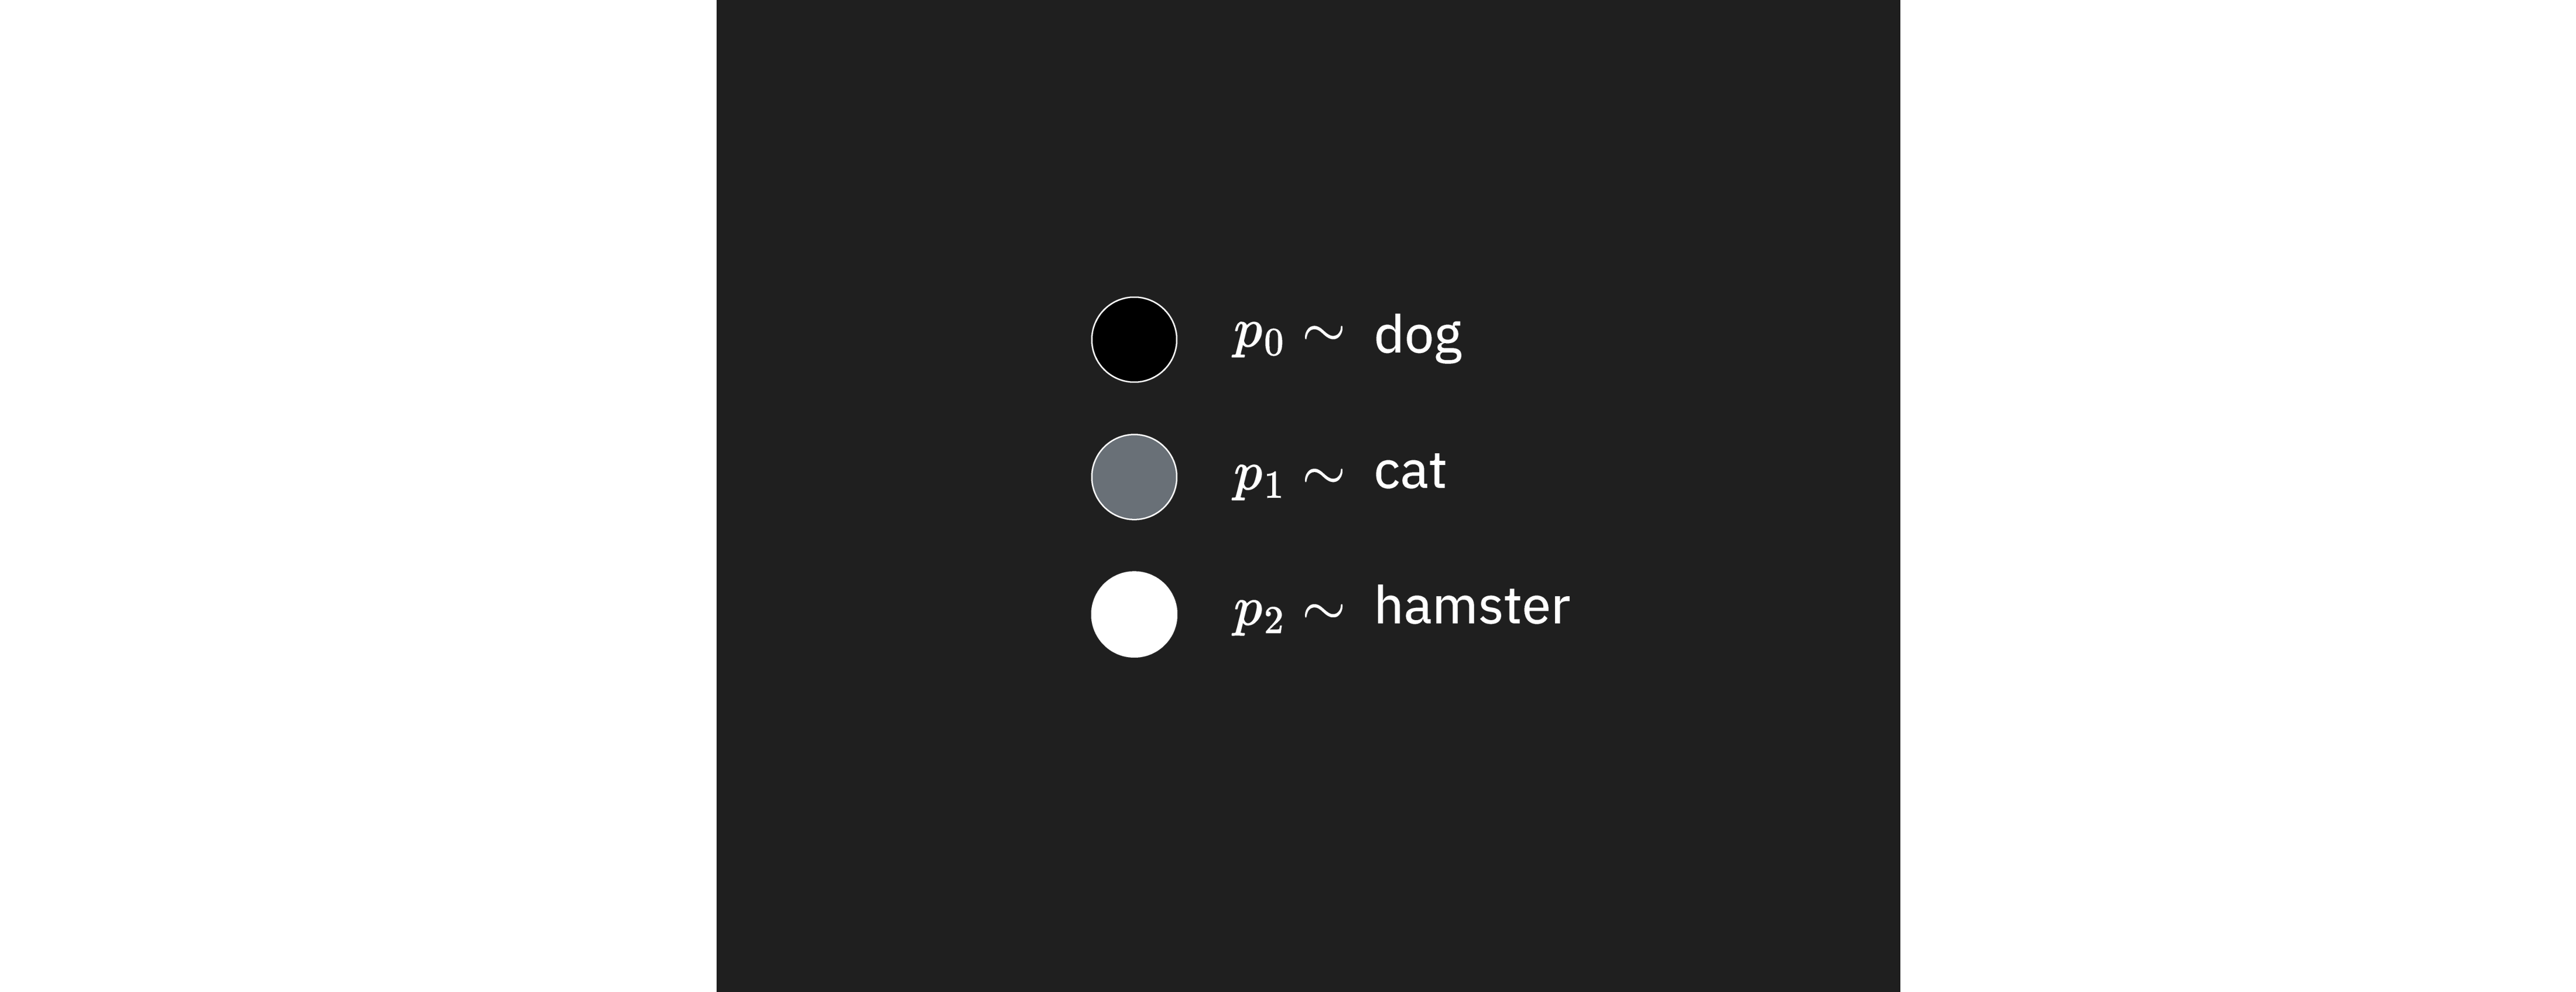

The neurons in each layer process signals that they receive from a previous layer and transmit them to the next one through weights, $w_i$ (the connections in the diagram). If we focus on one of these neurons, we have the building block of a neural network, which is called a "perceptron". Mathematically, a perceptron takes in an input vector $\vec{x}$, and computes its inner product with a trainable weight vector plus some bias. And very importantly, the perceptron applies a non-linear activation function ($\sigma$) on top of this computation. These non-linear activation functions are critical for the great expressive power of neural networks. Another way to think about this is that, if we didn’t have non-linearity in between layers, then we could in principle write the whole neural network as one big matrix multiplication. This would simply result in a linear model, which would not be able to capture the complex patterns that deep neural networks can. Therefore, nonlinear activation functions are fundamental in neural networks. 

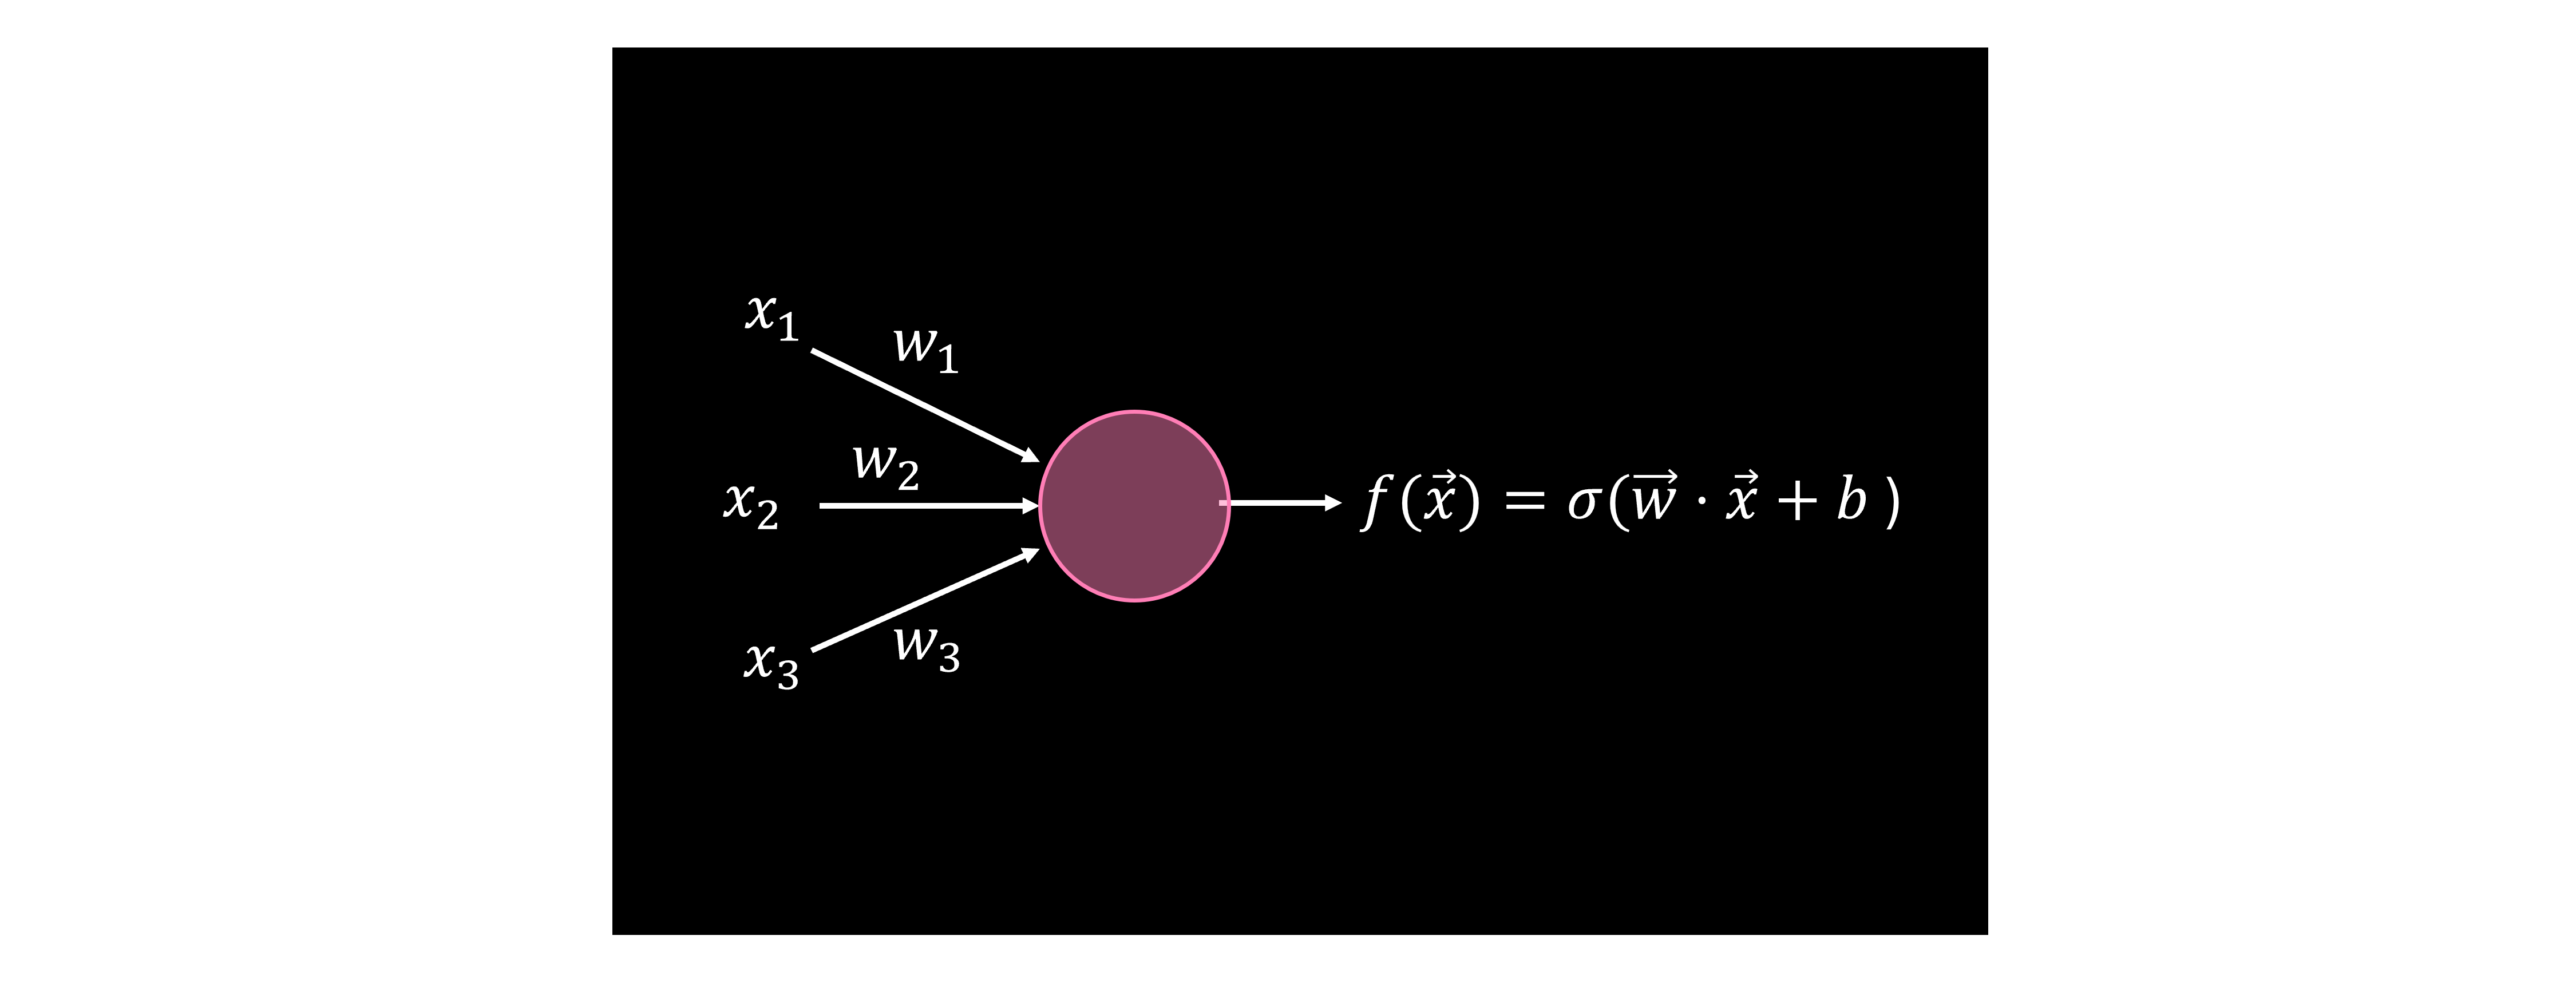

Functions like
$$
f(\vec{x}) = \sigma (\vec{w}\cdot \vec{x}+\vec{b})
$$

are calculated at every neuron using the the known data $\vec{x}$ and non-linear $\sigma$ and also the unknown vectors of weights $\vec{w}$ and biases $\vec{b}$. Generally, there could be non-zero weights between all neurons of all layers, and we would call the weights from layer $L$ to layer $L+1$ between neurons $m$ and $n$ $w^L_{m,n}$. Similarly the bias on the $n^\text{th}$ neuron of the $L^\text{th}$ layer would be $b^L_n.$ The biases here are unrelated to the $b$'s from the quantum kernel discussion. 

You might start your neural network with a random set of weights and biases, or from a known reasonable starting configuration. From there, the idea is to check how well your neural network classifies things and improve it. We use a cost function to describe how our neural network deviates from correct classification. There are many ways of defining a cost function. We will describe one common example, here, which involves the mean-squared error (MSE): 

$$
C(w^L_{m,n},b^L_n) = \frac{1}{N}\sum_{i=1}^{N_\text{train}}\sum_{j=1}^{N_\text{outputs}}{(v_{i,j}-p_{i,j})^2}
$$

Depending on your application, this could mean taking the difference between the actual value $v_{i,j}$ of an image $i$ from training data for output $j$ (say for example, a value of 1.0 on the output layer neuron for "dog" and a 0 on all other neurons) and the predicted value $p_{i,j}$. Square that difference and sum over all the categories, so it captures not only whether the right category was most activated, but also if incorrect activations are reduced. We then sum over all the examples in our training set and obtain a cost.

We then vary the parameters like the weights in each layer, between all the neurons, and the biases on all neurons. Classical optimization routines like gradient descent  are used to search for a local minimum in the cost function.

### Quantum perceptron

To be able to build the quantum counterpart of the perceptron, the one of the things we need to consider is to be able to implement non-linearity with quantum circuits, which is the role of the activation function in classical neural networks. This is because without additional considerations, quantum circuits only implement unitary operations, which are simply linear. There are different methods that we can use to introduce non-linearity to quantum circuits. One of the main methods is to use measurements as a source of non-linearity. Other considerations include quantum Fourier transform based methods, mid-circuit measurements or dynamic circuits, and tracing qubits out of the circuit.

### Quantum neural network
A quantum neural network (QNN) works by first encoding the input data with the unitary layer $U$ in the figure, then applying quantum circuits corresponding to weights between layers ($W$’s below), and finally a layer of measurement. A few key points about this:
- The data loading and weightings are linear operations 
- The measurements are non-linear
- So as in the classical NN, we have both linear and non-linear components
- The weight circuits still have variational parameters, so there is still a classical minimization to be carried out.

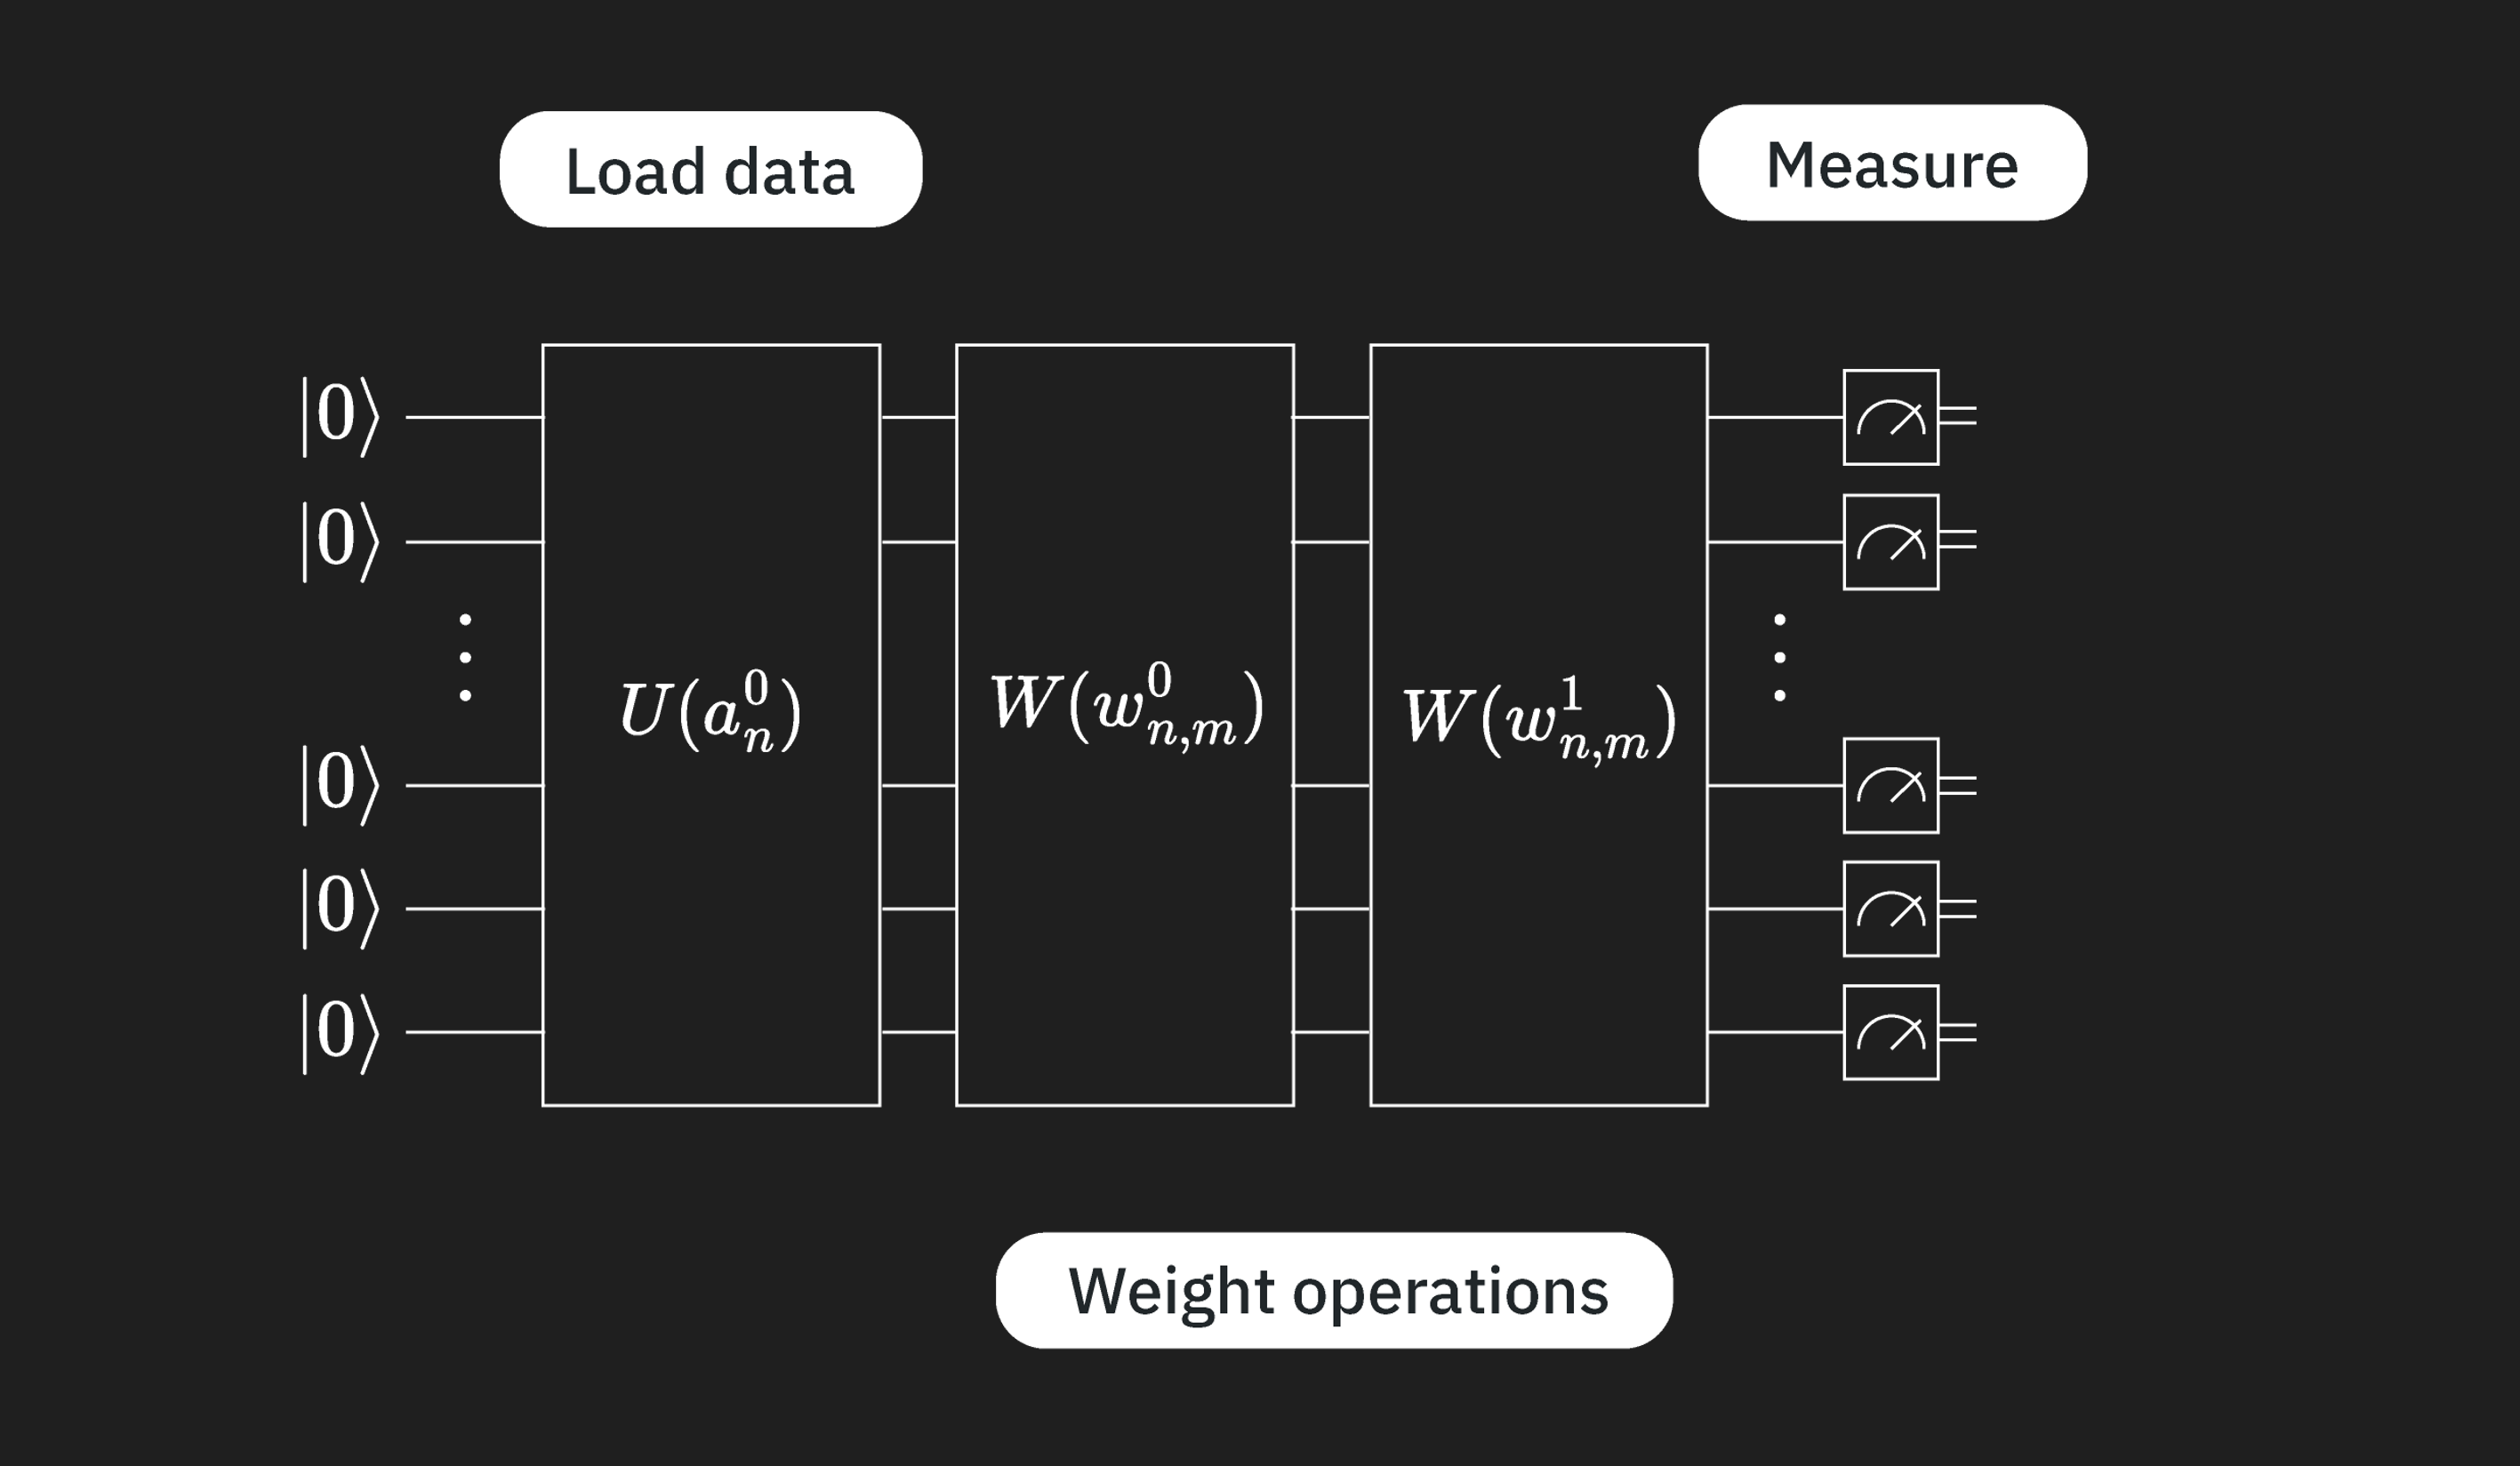

We can use a circuit like that above to calculate a function 
$$f_{QNN}(x) = \langle 0|U^{\dagger}(X)W^{\dagger}OWU(x)|0\rangle $$
Note that this function is not generally the same as the function $f(x)$ described in classical NNs. In particular, this function includes potentially many layers of many weights, and is applied across all data loaded into your quantum circuit by $U$. 

### Generalizations

We can now look at one of the ways of constructing the quantum counterpart of a neural network. In this model, the information flow is different from a classical feed-forward neural network. In the classical setting, information would flow from left to right, starting with the input and ending with the model output, and in the reverse direction when doing backpropagation to train the model.

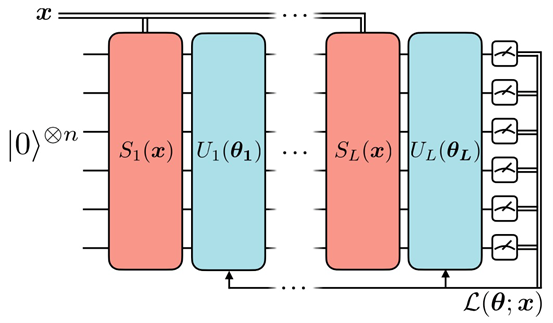

However, in this quantum neural network construction, we see that the unitary block that encodes the data repeats itself between the variational unitary blocks with the trainable parameters. This strategy, which we refer to as “data reuploading”, is backed by interesting theoretical results. In fact, a paper by [Pérez-Salinas et al.](https://quantum-journal.org/papers/q-2020-02-06-226/) shows that, with the help of multiple data-reuploading, “a single qubit provides sufficient computational capabilities to construct a universal quantum classifier when assisted with a classical subroutine.” Therefore, data reuploading is a technique that we can use to enhance the expressiveness and representational power of the model, allowing the quantum neural network to approximate complex functions. 


## References

[1] ["Reinforcement Learning: An Introduction"](http://incompleteideas.net/book/the-book-2nd.html), Richard S. Sutton and Richard G. Barto, MIT Press, Second Edition, Cambridge, MA, 2018

[2] ["Pattern Recognition and Machine Learning"](https://link.springer.com/book/9780387310732), Christopher M. Bishop, Springer, 2006

[3] ["Foundations of Machine Learning"](https://cs.nyu.edu/~mohri/mlbook/), Mehryar Mohri, Afshin Rostamizadeh, and Ameet Talwalkar, MIT Press, Second Edition, 2018.